<a href="https://colab.research.google.com/github/omron-sinicx/ComputationalMouthfeel/blob/main/Bouba_and_Kiki_shaped_Chocolate_Bayesian_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%env MKL_THREADING_LAYER=GNU
!pip install pymc=='4.1.2'


env: MKL_THREADING_LAYER=GNU
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.6/557.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for aeppl: filename=aeppl-0.0.32-py3-none-any.whl size=49370 sha256=27b8cf8ead851552c5a5d9722a144ae9618c9b2bc361572d2360139781019187
  Stored in directory: /root/.cache/pip/wheels/73/88/bc/f136ba292a772f7a05cac3bff81a1def001d642d933271f69e
  Created wheel for aesara: filename=aesara-2.7.5-py3-none-any.whl size=1375081 sha256=e322a58c0a47a035b92c561660696f2d68efbf4034e817084f69c219777662c5
  Stored in directory: /root/.cache/pip/wheels/da/69/2c/5fcfc06c87e1ed24704775a0e19dba17b6024c9df8e33eec21
Successfully built aeppl aesara
  A

In [ ]:
import pymc as pm

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import aesara.tensor as at
import aesara

import statistics
import math

import arviz as az

from google.colab import files

plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=3)
pd.set_option('display.precision', 3)

<ipython-input-2-a905e1708df8>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
STIM_1_NAME = 'Bouba-A6' # 'Bouba-Asymmetry-6'
STIM_2_NAME = 'Kiki-A6' # 'Kiki-Asymmetry-6'
STIM_3_NAME = 'Bouba-S6' # 'Bouba-Symmetry-6'
STIM_4_NAME = 'Kiki-A10' # 'Kiki-Asymmetry-10'

STIM_NAMES = [STIM_1_NAME, STIM_2_NAME, STIM_3_NAME, STIM_4_NAME]

VALUE_MIN = 0
VALUE_MAX = 100

SWEET_BA6 = [25.0, 40.0, 62.0, 55.0, 50.0, 20.0, 20.0, 80.0, 24.0, 36.0, 45.0, 8.0, 45.0, 41.0, 40.0, 30.0, 30.0, 49.0, 59.0, 30.0, 45.0, 31.0, 14.0, 45.0]
SWEET_KA6 = [60.0, 15.0, 35.0, 11.0, 50.0, 20.0, 25.0, 19.0, 28.0, 37.0, 40.0, 11.0, 40.0, 10.0, 55.0, 20.0, 50.0, 29.0, 40.0, 29.0, 30.0, 26.0, 7.0, 6.0]
SWEET_BS6 = [25.0, 6.0, 63.0, 10.0, 60.0, 50.0, 30.0, 51.0, 41.0, 30.0, 45.0, 10.0, 68.0, 60.0, 45.0, 10.0, 25.0, 30.0, 60.0, 39.0, 46.0, 23.0, 63.0, 85.0]
SWEET_KA10 = [40.0, 43.0, 55.0, 12.0, 50.0, 16.0, 15.0, 22.0, 34.0, 8.0, 40.0, 10.0, 52.0, 10.0, 30.0, 30.0, 30.0, 61.0, 51.0, 23.0, 58.0, 32.0, 7.0, 9.0]

SOUR_BA6 = [0.0, 23.0, 24.0, 13.0, 55.0, 20.0, 35.0, 30.0, 10.0, 4.0, 80.0, 0.0, 38.0, 61.0, 46.0, 0.0, 35.0, 52.0, 65.0, 17.0, 22.0, 40.0, 1.0, 14.0] 
SOUR_KA6 = [5.0, 25.0, 20.0, 2.0, 55.0, 60.0, 40.0, 70.0, 15.0, 11.0, 80.0, 0.0, 53.0, 60.0, 60.0, 0.0, 0.0, 61.0, 70.0, 79.0, 17.0, 18.0, 1.0, 1.0]
SOUR_BS6 = [0.0, 2.0, 25.0, 16.0, 55.0, 70.0, 29.0, 50.0, 14.0, 10.0, 10.0, 0.0, 34.0, 81.0, 50.0, 0.0, 35.0, 14.0, 10.0, 30.0, 21.0, 8.0, 7.0, 47.0]
SOUR_KA10 = [5.0, 19.0, 30.0, 9.0, 55.0, 69.0, 40.0, 73.0, 12.0, 9.0, 70.0, 10.0, 23.0, 40.0, 70.0, 0.0, 40.0, 72.0, 10.0, 10.0, 7.0, 14.0, 4.0, 3.0]

BITTER_BA6 = [40.0, 28.0, 50.0, 65.0, 65.0, 76.0, 70.0, 61.0, 66.0, 66.0, 73.0, 90.0, 25.0, 50.0, 65.0, 60.0, 50.0, 61.0, 40.0, 62.0, 22.0, 50.0, 34.0, 34.0] 
BITTER_KA6 = [65.0, 33.0, 75.0, 18.0, 65.0, 61.0, 60.0, 51.0, 51.0, 41.0, 35.0, 90.0, 70.0, 60.0, 65.0, 60.0, 40.0, 73.0, 50.0, 26.0, 48.0, 60.0, 46.0, 86.0]
BITTER_BS6 = [60.0, 58.0, 54.0, 46.0, 65.0, 70.0, 40.0, 60.0, 14.0, 35.0, 70.0, 90.0, 21.0, 40.0, 0.0, 70.0, 50.0, 67.0, 10.0, 60.0, 44.0, 63.0, 75.0, 20.0]
BITTER_KA10 = [30.0, 28.0, 68.0, 18.0, 60.0, 55.0, 65.0, 83.0, 23.0, 90.0, 20.0, 80.0, 69.0, 70.0, 80.0, 70.0, 50.0, 69.0, 17.0, 82.0, 18.0, 70.0, 54.0, 39.0]

LABEL_SWEET = 'Perceived Sweetness'
LABEL_SOUR = 'Perceived Sourness'
LABEL_BITTER = 'Perceived Bitterness'

chains = 5
draws = 5000
burnin = 1000
seed = [123] * chains

In [ ]:
def show_boxplot(data, label):
  plt.boxplot(data, labels=[STIM_1_NAME, STIM_2_NAME, STIM_3_NAME, STIM_4_NAME], showmeans=True)
  plt.ylim(VALUE_MIN, VALUE_MAX)
  plt.ylabel(label)

  plt.show()
  # plt.savefig(label + '.pdf')
  # files.download(label + '.pdf')

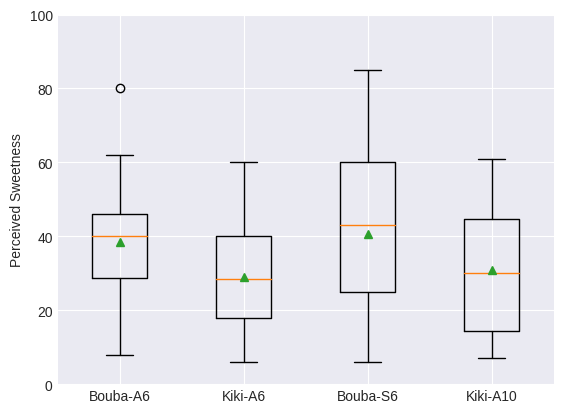

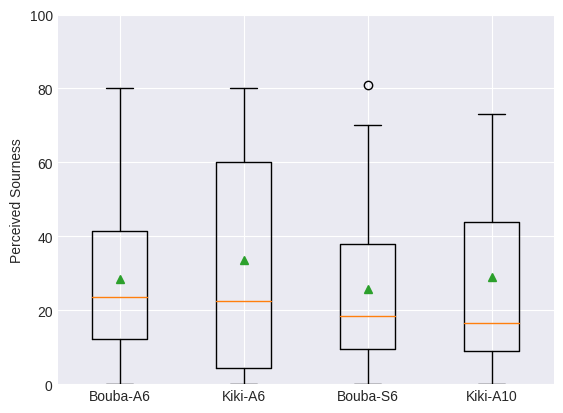

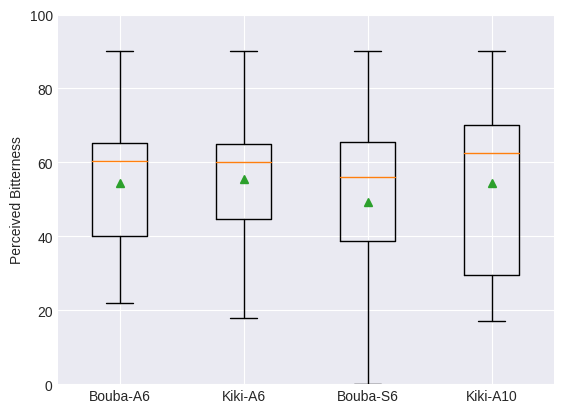

In [ ]:
# Visualize the data (boxplot)
show_boxplot([SWEET_BA6, SWEET_KA6, SWEET_BS6, SWEET_KA10], LABEL_SWEET)
show_boxplot([SOUR_BA6, SOUR_KA6, SOUR_BS6, SOUR_KA10], LABEL_SOUR)
show_boxplot([BITTER_BA6, BITTER_KA6, BITTER_BS6, BITTER_KA10], LABEL_BITTER)

In [ ]:
# Summary (Sweetness)
data = pd.DataFrame([SWEET_BA6, SWEET_KA6, SWEET_BS6, SWEET_KA10], index=[STIM_1_NAME, STIM_2_NAME, STIM_3_NAME, STIM_4_NAME]).transpose()
data.describe()

,Bouba-A6,Kiki-A6,Bouba-S6,Kiki-A10
count,24.000,24.000,24.000,24.000
mean,38.500,28.875,40.625,30.750
std,16.519,15.448,21.122,17.672
min,8.000,6.000,6.000,7.000
25%,28.750,18.000,25.000,14.250
50%,40.000,28.500,43.000,30.000
75%,46.000,40.000,60.000,44.750
max,80.000,60.000,85.000,61.000


In [ ]:
# Summary (Sourness)
data = pd.DataFrame([SOUR_BA6, SOUR_KA6, SOUR_BS6, SOUR_KA10], index=[STIM_1_NAME, STIM_2_NAME, STIM_3_NAME, STIM_4_NAME]).transpose()
data.describe()

,Bouba-A6,Kiki-A6,Bouba-S6,Kiki-A10
count,24.000,24.000,24.000,24.000
mean,28.542,33.458,25.750,28.917
std,22.645,29.150,22.874,25.978
min,0.000,0.000,0.000,0.000
25%,12.250,4.250,9.500,9.000
50%,23.500,22.500,18.500,16.500
75%,41.500,60.000,38.000,43.750
max,80.000,80.000,81.000,73.000


In [ ]:
# Summary (Bitterness)
data = pd.DataFrame([BITTER_BA6, BITTER_KA6, BITTER_BS6, BITTER_KA10], index=[STIM_1_NAME, STIM_2_NAME, STIM_3_NAME, STIM_4_NAME]).transpose()
data.describe()

,Bouba-A6,Kiki-A6,Bouba-S6,Kiki-A10
count,24.000,24.000,24.000,24.000
mean,54.292,55.375,49.250,54.500
std,17.497,17.778,22.926,24.146
min,22.000,18.000,0.000,17.000
25%,40.000,44.750,38.750,29.500
50%,60.500,60.000,56.000,62.500
75%,65.250,65.000,65.500,70.000
max,90.000,90.000,90.000,90.000


# Bayesian analysis

In [ ]:
def show_level_effect(idata):
  print('-- a_j > 0 --')
  for i in range(4):
      print('{}: {:.3f} %'.format(STIM_NAMES[i], (idata.posterior['a'][:,:,i] > 0).mean() * 100))

  print()

  print('-- a_j < 0 --')
  for i in range(4):
      print('{}: {:.3f} %'.format(STIM_NAMES[i], (idata.posterior['a'][:,:,i] < 0).mean() * 100))

In [ ]:
def compare(a, b, idata):
    return (idata.posterior['mu'][:,:,a] - idata.posterior['mu'][:,:,b] > 0).mean().data

In [ ]:
def show_level_comparision(idata):
  #Probability that the sample in row i was more sour than the sample in column j
  result = pd.DataFrame(
      [[0, compare(0, 1, idata), compare(0, 2, idata), compare(0, 3, idata)],
      [compare(1, 0, idata), 0, compare(1, 2, idata), compare(1, 3, idata)],
      [compare(2, 0, idata), compare(2, 1, idata), 0, compare(2, 3, idata)],
      [compare(3, 0, idata), compare(3, 1, idata), compare(3, 2, idata),0]
      ],
      columns=STIM_NAMES,
      index=STIM_NAMES)
  display(result)

In [ ]:
import arviz.labels as azl
plt.rcParams["mathtext.default"]= "default"
plt.rcParams["figure.figsize"] = (6,4)
labeller = azl.MapLabeller(var_name_map={"mu1 - mu2": r"$\mu_1 - \mu_2$","mu1 - mu3": r"$\mu_1 - \mu_3$","mu1 - mu4": r"$\mu_1 - \mu_4$","mu2 - mu3": r"$\mu_2 - \mu_3$","mu2 - mu4": r"$\mu_2 - \mu_4$","mu3 - mu4": r"$\mu_3 - \mu_4$"})
def hdi_plot(idata,eps_name):
  az.plot_posterior(idata.posterior, var_names=["mu1 - mu2","mu1 - mu3","mu1 - mu4","mu2 - mu3","mu2 - mu4","mu3 - mu4",], hdi_prob=0.95, labeller=labeller, ref_val=0,point_estimate="mode")
  plt.savefig(eps_name, bbox_inches="tight", pad_inches=0.05)
  plt.show()

## Perceived Sweetness

In [ ]:
with pm.Model() as mv_model_sweet:
    # Prior distribution
    mu = pm.Uniform('mu', 0, 100, shape=4)
    sigma = pm.Uniform('sigma', 0, 50, shape=4)

    C_triu = pm.LKJCorr('omega', n=4, eta=2)
    C = at.fill_diagonal(C_triu[np.zeros((4, 4), dtype=np.int64)], 1)
    sigma_diag = at.diag(sigma)
    cov = at.nlinalg.matrix_dot(sigma_diag, C, sigma_diag)

    # Likelihood
    y_pred = pm.MvNormal('y_pred', mu=mu, cov=cov, observed=np.stack((SWEET_BA6, SWEET_KA6, SWEET_BS6, SWEET_KA10)).T)

    # Total mean
    total_mean = pm.Deterministic('total_mean', (pm.math.sum(mu) / 4))
    
    # Effect of each level
    a = pm.Deterministic('a', mu - total_mean)

    # Post analysis
    mu_12 = pm.Deterministic('mu1 - mu2', mu[0] - mu[1])
    mu_13 = pm.Deterministic('mu1 - mu3', mu[0] - mu[2])
    mu_14 = pm.Deterministic('mu1 - mu4', mu[0] - mu[3])
    mu_23 = pm.Deterministic('mu2 - mu3', mu[1] - mu[2])
    mu_24 = pm.Deterministic('mu2 - mu4', mu[1] - mu[3])
    mu_34 = pm.Deterministic('mu3 - mu4', mu[2] - mu[3])

In [ ]:
with mv_model_sweet:
    idata_sweet = pm.sample(draws=draws, tune=burnin, chains=chains, target_accept=0.95, random_seed=seed)
    # idata = pm.sample(draws=20000, tune=1000, target_accept=0.95, chains=5)

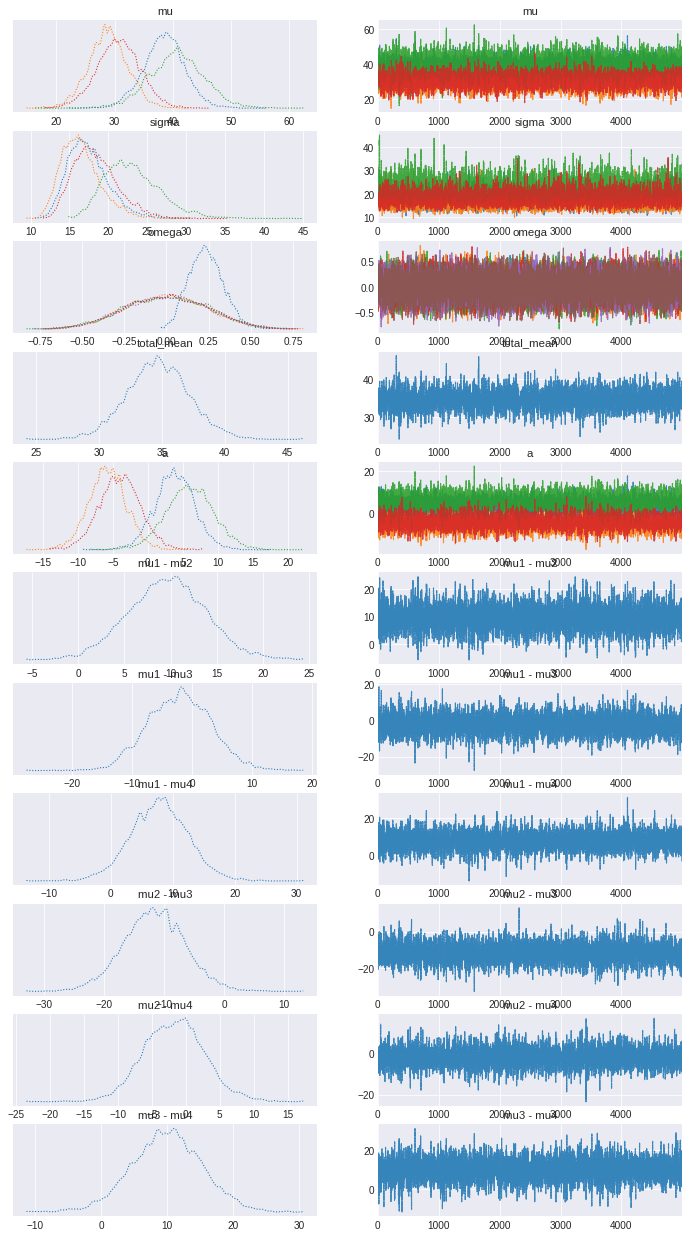

In [ ]:
az.plot_trace(idata_sweet, combined=True);

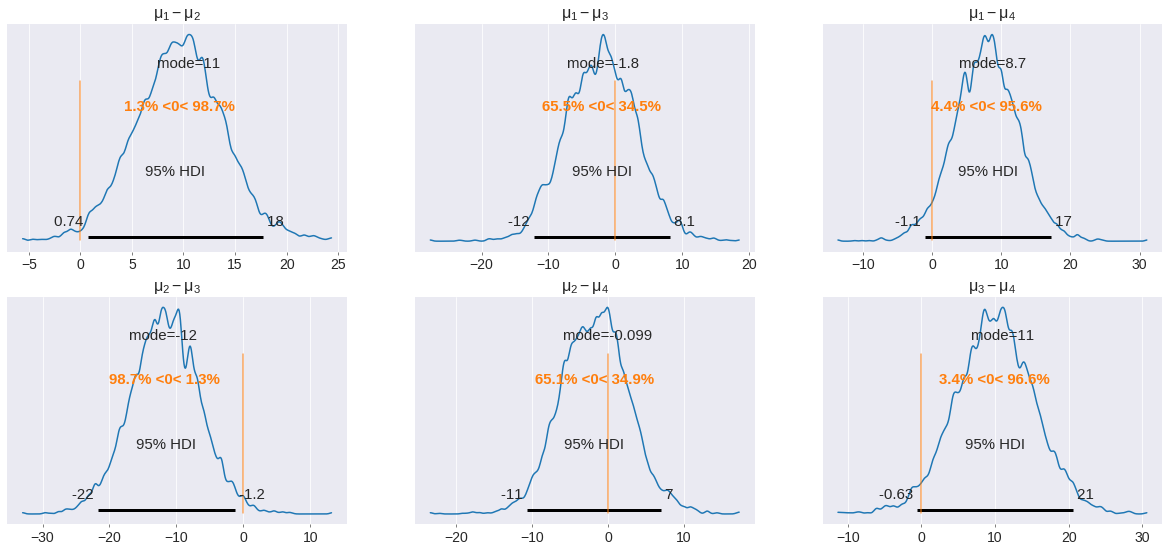

In [ ]:
hdi_plot(idata_sweet,"sweet.eps")

In [ ]:
az.summary(idata_sweet, round_to=2, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],38.52,3.59,31.21,45.27,0.02,0.02,22407.63,17878.47,1.0
mu[1],28.90,3.39,21.96,35.25,0.02,0.02,23606.18,18107.57,1.0
mu[2],40.63,4.80,31.58,50.29,0.03,0.02,21665.93,17871.35,1.0
mu[3],30.67,3.73,23.04,37.76,0.03,0.02,22213.26,13710.45,1.0
sigma[0],17.42,2.68,12.58,22.69,0.02,0.01,23735.11,14309.67,1.0
sigma[1],16.50,2.61,12.17,22.03,0.02,0.01,26826.42,17409.52,1.0
sigma[2],23.12,3.68,16.39,30.16,0.03,0.02,20556.00,13807.76,1.0
sigma[3],18.37,2.91,13.29,24.07,0.02,0.02,20721.11,14413.62,1.0
omega[0],0.24,0.10,0.04,0.43,0.00,0.00,22565.98,15567.53,1.0
omega[1],-0.00,0.24,-0.46,0.47,0.00,0.00,26294.49,17289.21,1.0


### Whether the level has an effect (which level is larger or smaller)


In [ ]:
show_level_effect(idata_sweet)

-- a_j > 0 --
Bouba-A6: 91.220 %
Kiki-A6: 1.760 %
Bouba-S6: 95.820 %
Kiki-A10: 8.580 %

-- a_j < 0 --
Bouba-A6: 8.780 %
Kiki-A6: 98.240 %
Bouba-S6: 4.180 %
Kiki-A10: 91.420 %


### Comparison between samples
Probability that the sample in row $i$ was sweeter than the sample in column $j$

In [ ]:
show_level_comparision(idata_sweet)

,Bouba-A6,Kiki-A6,Bouba-S6,Kiki-A10
Bouba-A6,0,0.987,0.3446,0.956
Kiki-A6,0.013,0,0.0128,0.349
Bouba-S6,0.6554,0.9872,0,0.9658
Kiki-A10,0.044,0.651,0.0342,0


In [ ]:
BA6_sweet_post = idata_sweet.posterior['mu'][:,:,0]
KA6_sweet_post = idata_sweet.posterior['mu'][:,:,1]
BS6_sweet_post = idata_sweet.posterior['mu'][:,:,2]
KA10_sweet_post = idata_sweet.posterior['mu'][:,:,3]

### H1:The basic Bouba-shaped sample would be perceived as sweeter than the basic Kiki-shaped sample.
(Bouba-A6 $>$ Kiki-A6)

In [ ]:
H1 = (BA6_sweet_post > KA6_sweet_post).mean().data
print("p(BA6 > KA6) = {:.3f}".format(H1))

p(BA6 > KA6) = 0.987


### H2:Bouba-shaped samples would be perceived as sweeter than Kiki-shaped samples , regardless of the shape differences.
([Bouba-S6 and Bouba-A6] $>$ [Kiki-A6 and Kiki-A10])


In [ ]:
H2 = (BA6_sweet_post > KA6_sweet_post).mean().data * (BA6_sweet_post > KA10_sweet_post).mean().data * (BS6_sweet_post > KA6_sweet_post).mean().data * (BS6_sweet_post > KA10_sweet_post).mean().data
print("p((BA6, BS6) > (KA6, KA10)) = {:.3f}".format(H2))

p((BA6, BS6) > (KA6, KA10)) = 0.900


### H3:The symmetric Bouba-shaped sample would be perceived as sweeter than the asymmetric sample.
(Bouba-S6 $>$ Bouba-A6)

In [ ]:
H3 = (BS6_sweet_post > BA6_sweet_post).mean().data
print("p(BS6 > BA6 ) = {:.3f}".format(H3))

p(BS6 > BA6 ) = 0.655


## Perceived Sourness

In [ ]:
with pm.Model() as mv_model_sour:
    # Prior distribution
    mu = pm.Uniform('mu', 0, 100, shape=4)
    sigma = pm.Uniform('sigma', 0, 50, shape=4)

    C_triu = pm.LKJCorr('omega', n=4, eta=2)
    C = at.fill_diagonal(C_triu[np.zeros((4, 4), dtype=np.int64)], 1)
    sigma_diag = at.diag(sigma)
    cov = at.nlinalg.matrix_dot(sigma_diag, C, sigma_diag)

    # Likelihood
    y_pred = pm.MvNormal('y_pred', mu=mu, cov=cov, observed=np.stack((SOUR_BA6, SOUR_KA6, SOUR_BS6, SOUR_KA10)).T)
    
    # Total mean
    total_mean = pm.Deterministic('total_mean', (pm.math.sum(mu) / 4))

    # Effect of each level
    a = pm.Deterministic('a', mu - total_mean)

    # Post analysis
    mu_12 = pm.Deterministic('mu1 - mu2', mu[0] - mu[1])
    mu_13 = pm.Deterministic('mu1 - mu3', mu[0] - mu[2])
    mu_14 = pm.Deterministic('mu1 - mu4', mu[0] - mu[3])
    mu_23 = pm.Deterministic('mu2 - mu3', mu[1] - mu[2])
    mu_24 = pm.Deterministic('mu2 - mu4', mu[1] - mu[3])
    mu_34 = pm.Deterministic('mu3 - mu4', mu[2] - mu[3])

In [ ]:
with mv_model_sour:
    idata_sour = pm.sample(draws=draws, tune=burnin, chains=chains, target_accept=0.95, random_seed=seed)

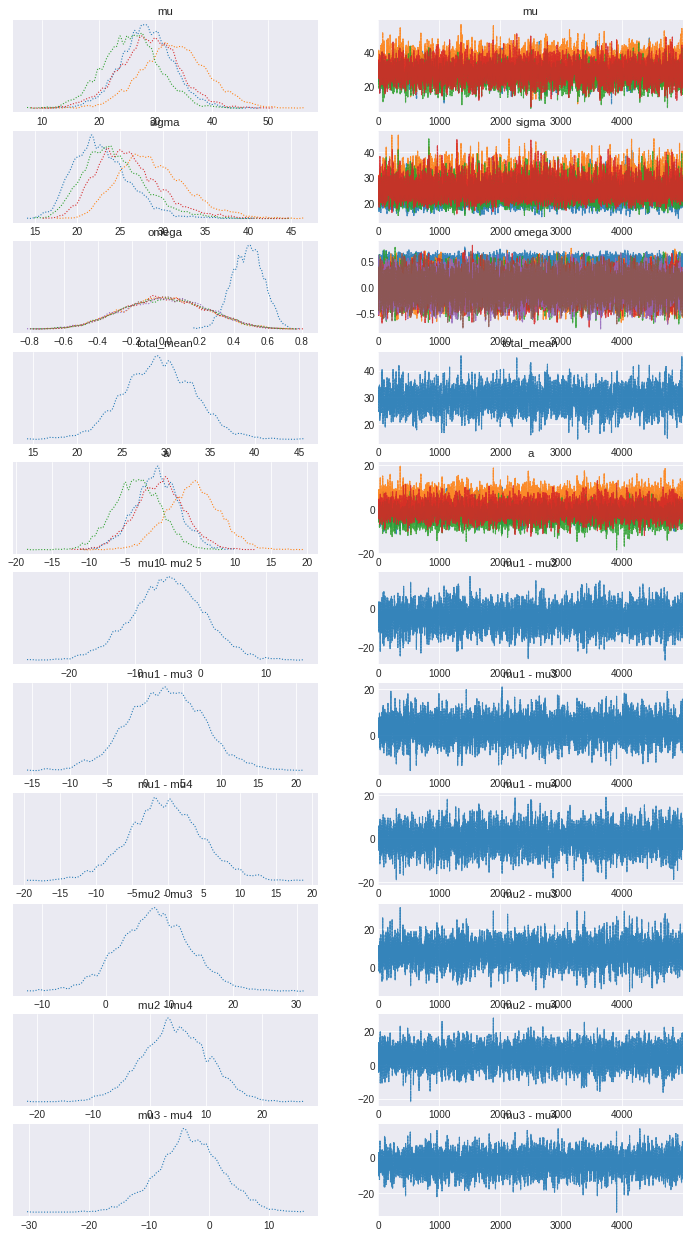

In [ ]:
az.plot_trace(idata_sour, combined=True);

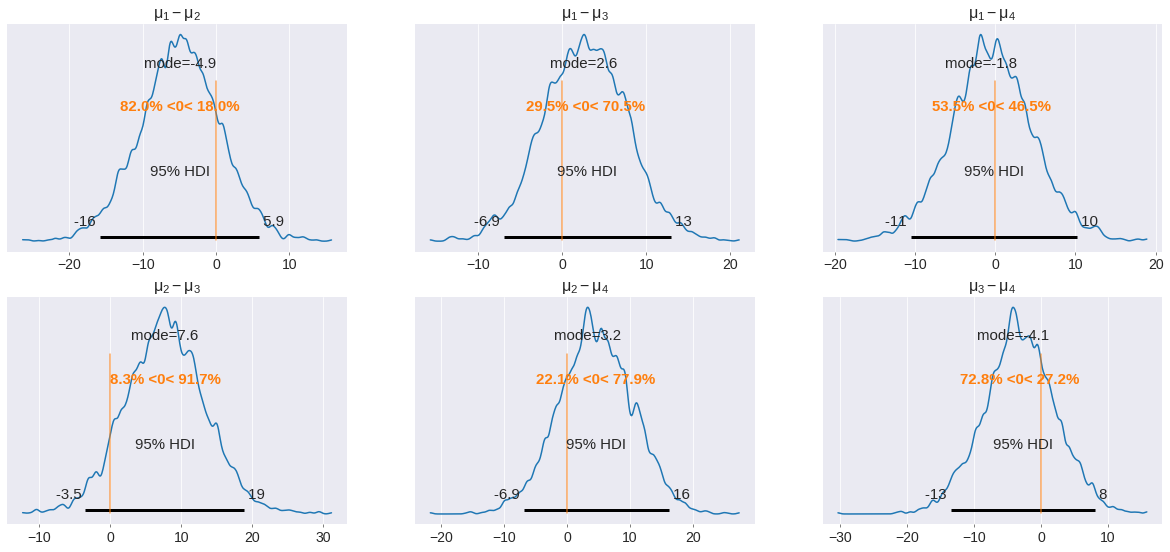

In [ ]:
hdi_plot(idata_sour,"sour.eps")

In [ ]:
az.summary(idata_sour, round_to=2, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],28.49,4.64,19.20,37.75,0.04,0.03,15034.17,15968.46,1.0
mu[1],33.45,5.87,22.41,45.23,0.05,0.03,16380.70,14931.08,1.0
mu[2],25.75,5.02,15.88,35.52,0.04,0.03,15705.98,15524.71,1.0
mu[3],28.91,5.40,17.81,39.36,0.04,0.03,15096.54,14245.10,1.0
sigma[0],22.91,3.38,17.14,29.94,0.02,0.02,23990.09,16121.75,1.0
sigma[1],28.83,4.07,21.91,37.58,0.03,0.02,22352.29,15523.81,1.0
sigma[2],24.38,3.70,17.82,31.92,0.03,0.02,23032.93,13831.83,1.0
sigma[3],25.94,3.82,19.12,33.75,0.03,0.02,20111.45,11920.26,1.0
omega[0],0.48,0.09,0.30,0.66,0.00,0.00,22748.61,18438.63,1.0
omega[1],-0.01,0.24,-0.46,0.47,0.00,0.00,23766.61,16993.27,1.0


### Whether the level has an effect (which level is larger or smaller)


In [ ]:
show_level_effect(idata_sour)

-- a_j > 0 --
Bouba-A6: 41.120 %
Kiki-A6: 88.340 %
Bouba-S6: 14.640 %
Kiki-A10: 47.760 %

-- a_j < 0 --
Bouba-A6: 58.880 %
Kiki-A6: 11.660 %
Bouba-S6: 85.360 %
Kiki-A10: 52.240 %


### Comparison between samples
Probability that the sample in row $i$ was more sour than the sample in column $j$

In [ ]:
show_level_comparision(idata_sour)

,Bouba-A6,Kiki-A6,Bouba-S6,Kiki-A10
Bouba-A6,0,0.1802,0.7054,0.4652
Kiki-A6,0.8198,0,0.9166,0.779
Bouba-S6,0.2946,0.0834,0,0.2724
Kiki-A10,0.5348,0.221,0.7276,0


In [ ]:
BA6_sour_post = idata_sour.posterior['mu'][:,:,0]
KA6_sour_post = idata_sour.posterior['mu'][:,:,1]
BS6_sour_post = idata_sour.posterior['mu'][:,:,2]
KA10_sour_post = idata_sour.posterior['mu'][:,:,3]

### H4: The basic Kiki-shaped sample would be perceived as more sour than the basic Bouba-shaped samples.
(Kiki-A6 $>$ Bouba-A6)

In [ ]:
H4 = (KA6_sour_post > BA6_sour_post).mean().data
print("p(KA6 > BA6) = {:.3f}".format(H4))

p(KA6 > BA6) = 0.820


### H5:Kiki-shaped samples would be perceived as more sour than Bouba-shaped samples. 
([Kiki-A6 and Kiki-A10] $>$ [Bouba-S6 and Bouba-A6])

In [ ]:
H5 = (KA6_sour_post > BA6_sour_post).mean().data * (KA6_sour_post > BS6_sour_post).mean().data * (KA10_sour_post > BA6_sour_post).mean().data * (KA10_sour_post > BS6_sour_post).mean().data
print("p((KA6, KA10) > (BA6, BS6)) = {:.3f}".format(H5))

p((KA6, KA10) > (BA6, BS6)) = 0.292


### H6: Kiki-shaped sample with more elements would be perceived as more sour than samples with fewer elements. 
(Kiki-A10 $>$ Kiki-A6)

In [ ]:
H6 = (KA10_sour_post > KA6_sour_post).mean().data * (KA6_sour_post > BA6_sour_post).mean().data * (BA6_sour_post > BS6_sour_post).mean().data
print("p(KA10 > KA6) = {:.3f}".format(H6))

p(KA10 > KA6) = 0.128


## Perceived Bitterness

In [ ]:
with pm.Model() as mv_model_bitter:
    # Prior distribution
    mu = pm.Uniform('mu', 0, 100, shape=4)
    sigma = pm.Uniform('sigma', 0, 50, shape=4)

    C_triu = pm.LKJCorr('omega', n=4, eta=2)
    C = at.fill_diagonal(C_triu[np.zeros((4, 4), dtype=np.int64)], 1)
    sigma_diag = at.diag(sigma)
    cov = at.nlinalg.matrix_dot(sigma_diag, C, sigma_diag)
    
    # Total mean
    total_mean = pm.Deterministic('total_mean', (pm.math.sum(mu) / 4))
    
    # Effect of each level
    a = pm.Deterministic('a', mu - total_mean)

    # Likelihood
    y_pred = pm.MvNormal('y_pred', mu=mu, cov=cov, observed=np.stack((BITTER_BA6, BITTER_KA6, BITTER_BS6, BITTER_KA10)).T)

    # Post analysis
    mu_12 = pm.Deterministic('mu1 - mu2', mu[0] - mu[1])
    mu_13 = pm.Deterministic('mu1 - mu3', mu[0] - mu[2])
    mu_14 = pm.Deterministic('mu1 - mu4', mu[0] - mu[3])
    mu_23 = pm.Deterministic('mu2 - mu3', mu[1] - mu[2])
    mu_24 = pm.Deterministic('mu2 - mu4', mu[1] - mu[3])
    mu_34 = pm.Deterministic('mu3 - mu4', mu[2] - mu[3])


In [ ]:
with mv_model_bitter:
    idata_bitter = pm.sample(draws=draws, tune=burnin, chains=chains, target_accept=0.95, random_seed=seed)

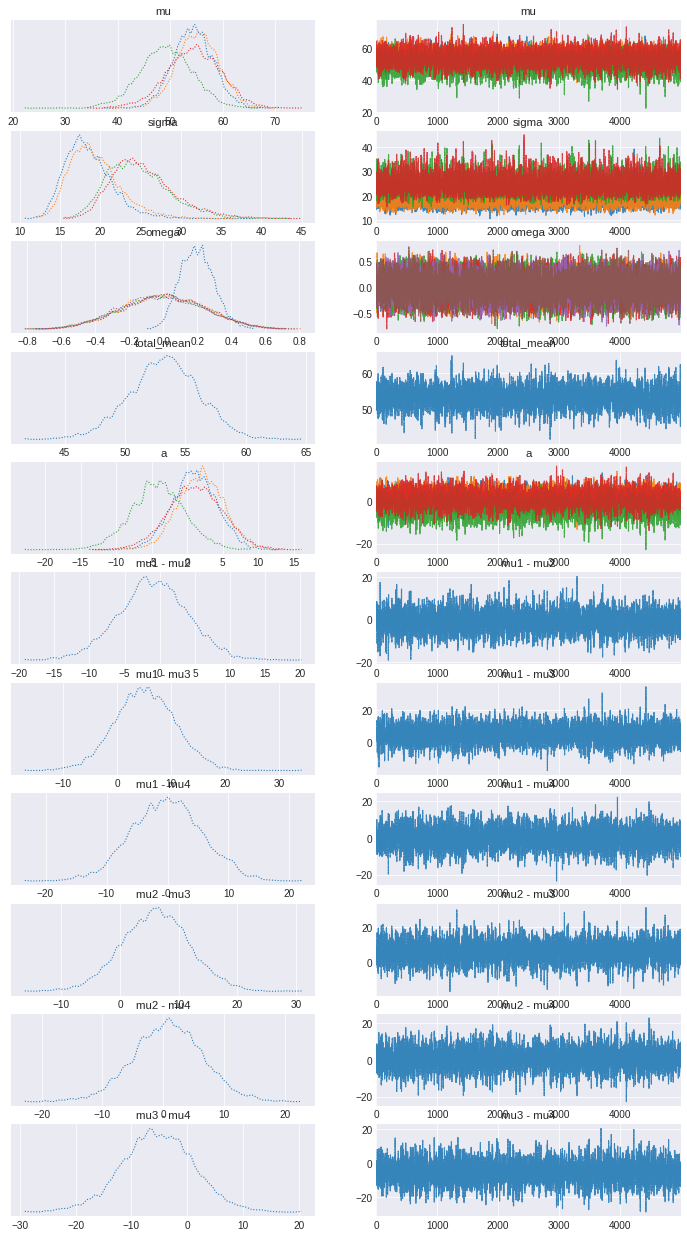

In [ ]:
az.plot_trace(idata_bitter, combined=True);

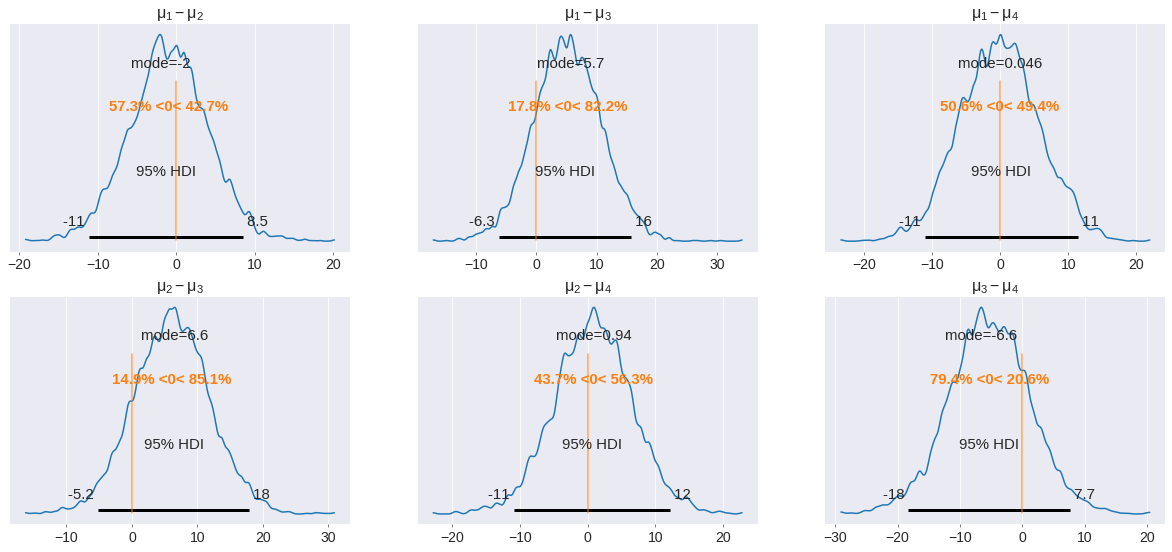

In [ ]:
hdi_plot(idata_bitter,"bitter.eps")

In [ ]:
az.summary(idata_bitter, round_to=2, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],54.29,3.84,46.62,61.74,0.02,0.02,24797.69,16388.48,1.0
mu[1],55.21,4.06,47.07,62.94,0.02,0.02,26875.42,17213.43,1.0
mu[2],49.14,5.11,38.94,58.90,0.03,0.02,28262.22,18353.68,1.0
mu[3],54.40,5.24,44.39,65.04,0.03,0.02,27115.06,17067.95,1.0
sigma[0],18.53,2.92,13.45,24.30,0.02,0.02,27505.93,13955.31,1.0
sigma[1],19.33,3.16,13.67,25.63,0.02,0.02,26375.13,15410.78,1.0
sigma[2],24.72,3.90,17.43,32.21,0.03,0.02,23505.13,12445.86,1.0
sigma[3],25.36,3.97,18.51,33.65,0.03,0.02,20577.61,10392.09,1.0
omega[0],0.20,0.10,0.02,0.40,0.00,0.00,22460.75,14951.00,1.0
omega[1],0.01,0.24,-0.49,0.44,0.00,0.00,30623.41,17676.22,1.0


### Whether the level has an effect (which level is larger or smaller)


In [ ]:
show_level_effect(idata_bitter)

-- a_j > 0 --
Bouba-A6: 62.860 %
Kiki-A6: 72.780 %
Bouba-S6: 13.500 %
Kiki-A10: 61.180 %

-- a_j < 0 --
Bouba-A6: 37.140 %
Kiki-A6: 27.220 %
Bouba-S6: 86.500 %
Kiki-A10: 38.820 %


### Comparison between samples
Probability that the sample in row $i$ was more bitter than the sample in column $j$

In [ ]:
show_level_comparision(idata_bitter)

,Bouba-A6,Kiki-A6,Bouba-S6,Kiki-A10
Bouba-A6,0,0.427,0.8224,0.4942
Kiki-A6,0.573,0,0.8508,0.5626
Bouba-S6,0.1776,0.1492,0,0.206
Kiki-A10,0.5058,0.4374,0.794,0


In [ ]:
BA6_bitter_post = idata_bitter.posterior['mu'][:,:,0]
KA6_bitter_post = idata_bitter.posterior['mu'][:,:,1]
BS6_bitter_post = idata_bitter.posterior['mu'][:,:,2]
KA10_bitter_post = idata_bitter.posterior['mu'][:,:,3]

### H7: The basic Kiki-shaped sample would be perceived as more bitter than the basic Bouba-shaped samples.
(Kiki-A6 $>$ Bouba-A6)

In [ ]:
val = (KA6_bitter_post > BA6_bitter_post).mean().data
print("p(KA6 > BA6) = {:.3f}".format(val))

p(KA6 > BA6) = 0.573


### H8: Kiki-shaped samples would be perceived as more bitter than Bouba-shaped samples. 
([Kiki-A6 and Kiki-A10] $>$ [Bouba-S6 and Bouba-A6])

In [ ]:
val = (KA6_bitter_post > BA6_bitter_post).mean().data * (KA6_bitter_post > BS6_bitter_post).mean().data * (KA10_bitter_post > BA6_bitter_post).mean().data * (KA10_bitter_post > BS6_bitter_post).mean().data
print("p((KA6, KA10) > (BA6, BS6)) = {:.3f}".format(val))

p((KA6, KA10) > (BA6, BS6)) = 0.196


### H9: Kiki-shaped sample with more elements would be perceived as more bitter than samples with fewer elements. 
(Kiki-A10 $>$ Kiki-A6)

In [ ]:
val = (KA10_bitter_post > KA6_bitter_post).mean().data
print("p(KA10 > KA6) = {:.3f}".format(val))

p(KA10 > KA6) = 0.437
